<a href="https://colab.research.google.com/github/imelda18/quizapp/blob/main/version%2089%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"imeldd","key":"7fbce2dfe18b7ad84106ec95c831721b"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:12<00:00, 212MB/s]
100% 2.29G/2.29G [00:12<00:00, 204MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

print("Train data:", os.listdir(train_dir))
print("Validation data:", os.listdir(val_dir))
print("Test data:", os.listdir(test_dir))


Train data: ['NORMAL', 'PNEUMONIA']
Validation data: ['NORMAL', 'PNEUMONIA']
Test data: ['NORMAL', 'PNEUMONIA']


In [7]:
print("Train samples:", len(os.listdir(train_dir + '/PNEUMONIA')) + len(os.listdir(train_dir + '/NORMAL')))
print("Validation samples:", len(os.listdir(val_dir + '/PNEUMONIA')) + len(os.listdir(val_dir + '/NORMAL')))
print("Test samples:", len(os.listdir(test_dir + '/PNEUMONIA')) + len(os.listdir(test_dir + '/NORMAL')))


Train samples: 5216
Validation samples: 16
Test samples: 624


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
normal_dir = os.path.join(train_dir, 'NORMAL')

# Get all filenames
pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

# Split files into train and validation
pneumonia_train, pneumonia_val = train_test_split(pneumonia_files, test_size=0.2, random_state=42)
normal_train, normal_val = train_test_split(normal_files, test_size=0.2, random_state=42)

# Create validation directories
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(val_dir, 'NORMAL')
os.makedirs(val_pneumonia_dir, exist_ok=True)
os.makedirs(val_normal_dir, exist_ok=True)

# Move validation files
for file in pneumonia_val:
    shutil.move(os.path.join(pneumonia_dir, file), os.path.join(val_pneumonia_dir, file))
for file in normal_val:
    shutil.move(os.path.join(normal_dir, file), os.path.join(val_normal_dir, file))

print("Train samples:", len(os.listdir(pneumonia_dir)) + len(os.listdir(normal_dir)))
print("Validation samples:", len(os.listdir(val_pneumonia_dir)) + len(os.listdir(val_normal_dir)))
print("Test samples:", len(os.listdir(test_dir + '/PNEUMONIA')) + len(os.listdir(test_dir + '/NORMAL')))


Train samples: 4172
Validation samples: 1060
Test samples: 624


In [14]:
import os

# Check the number of images in each class for the train, validation, and test datasets
train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

# Print the class distribution
print(f"Training dataset - NORMAL: {train_normal}, PNEUMONIA: {train_pneumonia}")
print(f"Validation dataset - NORMAL: {val_normal}, PNEUMONIA: {val_pneumonia}")
print(f"Test dataset - NORMAL: {test_normal}, PNEUMONIA: {test_pneumonia}")


Training dataset - NORMAL: 1072, PNEUMONIA: 3100
Validation dataset - NORMAL: 277, PNEUMONIA: 783
Test dataset - NORMAL: 234, PNEUMONIA: 390


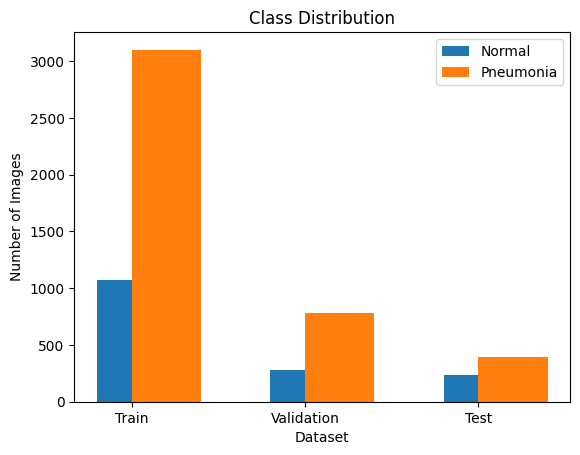

In [15]:
import matplotlib.pyplot as plt

# Create a plot for class distribution
datasets = ['Train', 'Validation', 'Test']
normal_counts = [train_normal, val_normal, test_normal]
pneumonia_counts = [train_pneumonia, val_pneumonia, test_pneumonia]

x = range(len(datasets))

# Plotting
plt.bar(x, normal_counts, width=0.4, label='Normal', align='center')
plt.bar(x, pneumonia_counts, width=0.4, label='Pneumonia', align='edge')

plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(x, datasets)
plt.legend()
plt.show()


In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up directories
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for the validation and test sets (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the flow from directory for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4172 images belonging to 2 classes.
Found 1060 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [21]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 65s 468ms/step - accuracy: 0.8835 - loss: 0.2592 - val_accuracy: 0.9271 - val_loss: 0.1941
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9062 - loss: 0.2271 - val_accuracy: 0.7500 - val_loss: 0.4417
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.8942 - loss: 0.2443 - val_accuracy: 0.8911 - val_loss: 0.2524
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step - accuracy: 0.9062 - loss: 0.2319 - val_accuracy: 0.7500 - val_loss: 0.6873
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 64s 466ms/step - accuracy: 0.9017 - loss: 0.2271 - val_accuracy: 0.8172 - val_loss: 0.3864
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3132 - val_accuracy: 1.0000 - val_loss: 0.0357
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 64s 464ms/step - accuracy: 0.8910 - loss: 0.2446 - val_accuracy: 0.8968 - val_loss: 0.2222
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.9375 - loss: 0.2319 -

In [30]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy as a percentage
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.9005 - loss: 0.2918
Test Accuracy: 89.10%


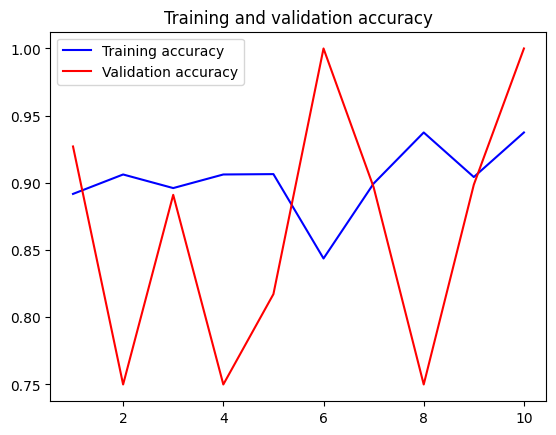

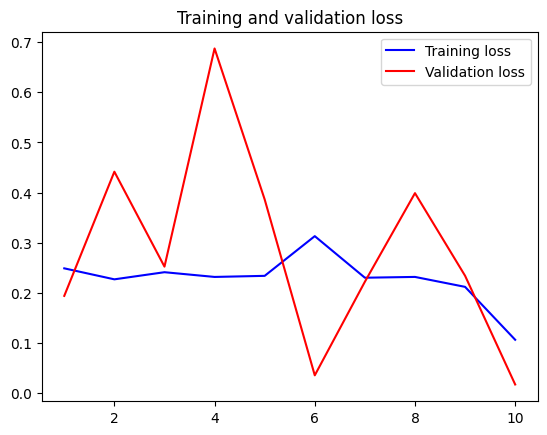

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Loss plot
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


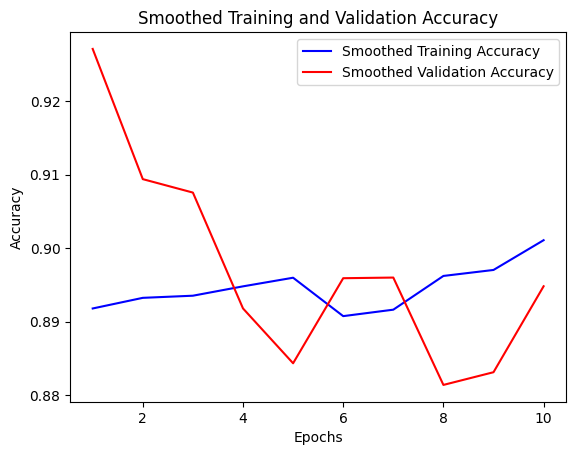

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Smoothing function for better curve visualization
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Smooth the accuracy values
smoothed_acc = smooth_curve(acc)
smoothed_val_acc = smooth_curve(val_acc)

# Plotting
epochs = range(1, len(smoothed_acc) + 1)
plt.plot(epochs, smoothed_acc, 'b', label='Smoothed Training Accuracy')
plt.plot(epochs, smoothed_val_acc, 'r', label='Smoothed Validation Accuracy')
plt.title('Smoothed Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


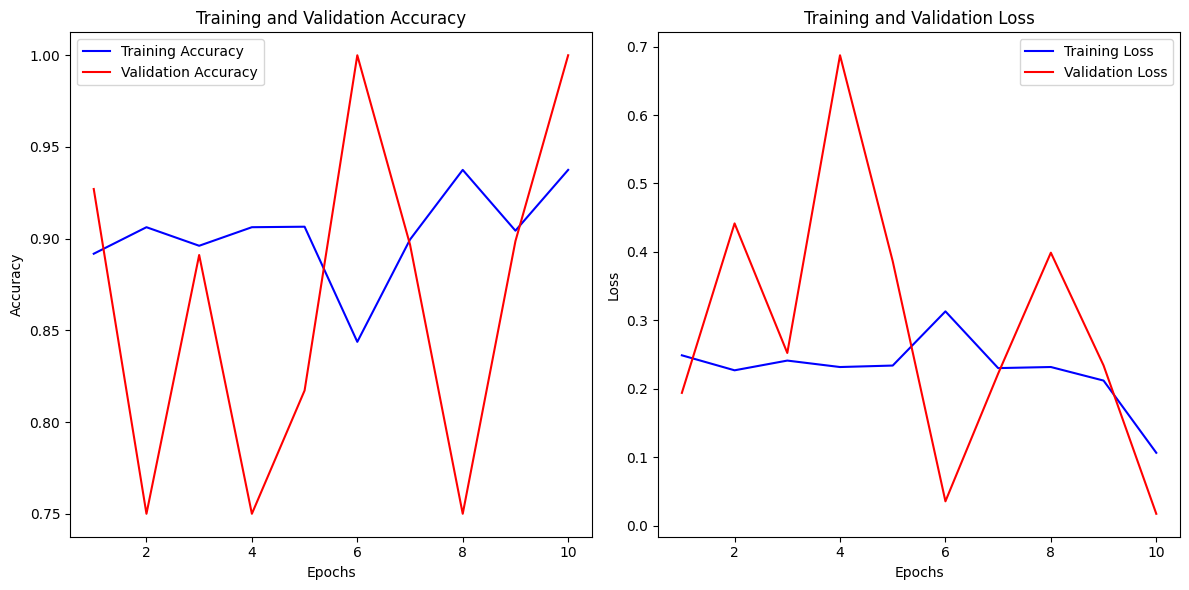

In [33]:
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step


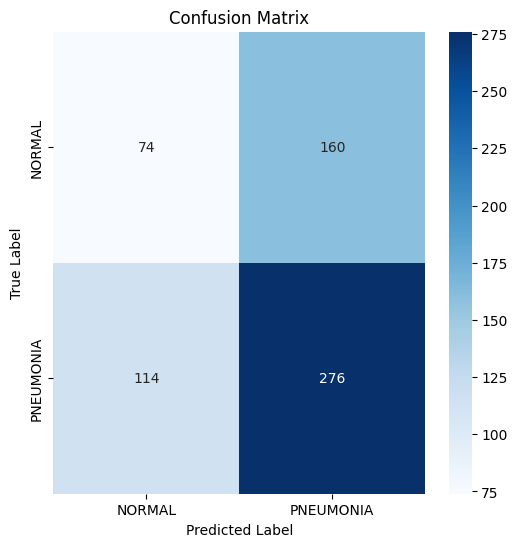

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes on the test set
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")

# Get true labels
true_labels = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to predict
img_path = '/content/chest_xray/test/NORMAL/IM-0007-0001.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match the input shape of the model

# Convert the image to a numpy array and rescale it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image (same as during training)

# Predict the class (0 or 1)
prediction = model.predict(img_array)
predicted_class = (prediction > 0.5).astype("int32")  # If prediction > 0.5, classify as 1, else 0

# Print the predicted class
if predicted_class == 0:
    print("Predicted Class: Normal")
else:
    print("Predicted Class: Pneumonia")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
Predicted Class: Normal


In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to predict
img_path = '/content/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match the input shape of the model

# Convert the image to a numpy array and rescale it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image (same as during training)

# Predict the class (0 or 1)
prediction = model.predict(img_array)
predicted_class = (prediction > 0.5).astype("int32")  # If prediction > 0.5, classify as 1, else 0

# Print the predicted class
if predicted_class == 0:
    print("Predicted Class: Normal")
else:
    print("Predicted Class: Pneumonia")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: Pneumonia


In [37]:
# Save the model to a file (in HDF5 format or TensorFlow SavedModel format)
model.save('pneumonia_finali.h5')  # HDF5 format (Keras' default format)
# Or use the SavedModel format:
# model.save('my_model')  # SavedModel format (TensorFlow format)


In [38]:
# Save the model to a file (in HDF5 format or TensorFlow SavedModel format)
model.save('pneumonia_finali.keras')  # HDF5 format (Keras' default format)
# Or use the SavedModel format:
# model.save('my_model')  # SavedModel format (TensorFlow format)
